In [1]:
# Import the requried packages
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model, neighbors, tree, svm, ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./horror_movies.csv', encoding='unicode_escape')
df.head()

,Unnamed: 0,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,...,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79
0,1,760161,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,2022/7/27,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,5088.584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,760741,Beast,Beast,en,A recently widowed man and his two teenage dau...,Fight for family.,2022/8/11,/xIGr7UHsKf0URWmyyd5qFMAq4d8.jpg,2172.338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,882598,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, itâs too late.",2022/9/23,/hiaeZKzwsk4y4atFhmncO5KRxeT.jpg,1863.628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,756999,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,2022/6/22,/lr11mCT85T1JanlgjMuhs9nMht4.jpg,1071.398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,772450,Presencias,Presences,es,A man who loses his wife and goes to seclude h...,NaN,2022/9/7,/dgDT3uol3mdvwEg0jt1ble3l9hw.jpg,1020.995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_num = df[['vote_count', 'vote_average', 'budget', 'revenue']].copy()
df_num = df_num.replace({'Released':np.nan, 'Cottontail Zombies Collection':np.nan, 'FALSE':np.nan})
df_num = df_num.replace(r'\/.*\.jpg$',np.nan,regex=True)
df_num = df_num.astype('float64')
df_num = df_num.dropna()
# df_num = df_num.drop()
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32328 entries, 0 to 32528
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   vote_count    32328 non-null  float64
 1   vote_average  32328 non-null  float64
 2   budget        32328 non-null  float64
 3   revenue       32328 non-null  float64
dtypes: float64(4)
memory usage: 1.2 MB


In [4]:
dd = df_num[df_num[['vote_count', 'vote_average', 'budget', 'revenue']]!=np.nan]
dd = dd.interpolate(method = 'linear', axis = 0) 
dd.head(20)

,vote_count,vote_average,budget,revenue
0,902.0,6.9,0.0,9572765.0
1,584.0,7.1,0.0,56000000.0
2,114.0,6.8,17000000.0,45000000.0
3,2736.0,7.9,18800000.0,161000000.0
4,83.0,7.0,0.0,0.0
5,1.0,1.0,0.0,0.0
6,125.0,5.8,20000000.0,2892594.0
7,1684.0,7.0,68000000.0,170800000.0
8,73.0,6.5,0.0,0.0
9,1035.0,6.8,10000000.0,14257609.0


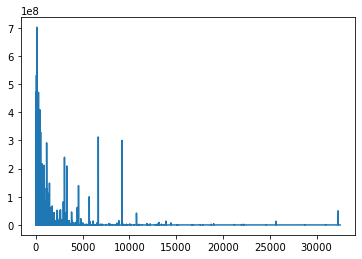

In [5]:
plt.plot(dd['revenue'])

In [6]:
X = dd[['vote_count', 'vote_average', 'budget']]
y = dd['revenue']